## Main Insight
It may be worth reviewing the policy behind subsidising this course of study, as a considerable proportion of students from each group do not go on to work in industries closely related to it. <br/>For Group X, this may be partially due to higher / comparable salaries offered by other industries. <br/>For Group Y, non-salary factors may play a more prominent role. 

### Data Characteristics:
1. There are considerably more students from Group X than Group Y in this course of study.
2. Proportionately more students from Group Y are in jobs unrelated to their course of study.
3. The distribution of students among various industries is considerably different between the two student groups.
4. Students from Group X tend to command higher salaries, for the same type of job & industry.
5. The salary differential between the two student groups differs by job nature and industry.

## Task 

Help your colleague present the insight in an intuitive manner that is easily understood by a non-technical audience, and that reflects as many characteristics in the list as possible. Be prepared to justify any and every aspect of your visualisation (e.g. chart choice, colour palette, labels, orientation, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

colors = ['#ac172b', '#78777d']
sns_palette = sns.color_palette(colors)

In [2]:
csv_file_path = "./data/student_group_combined.csv"
original_df = pd.read_csv(csv_file_path)
original_df

,industry,median_salary,count,job_nature,group
0,A,3150,83,closely_related,X
1,B,3300,53,closely_related,X
2,C,2650,47,closely_related,X
3,D,2400,12,closely_related,X
4,E,4100,30,somewhat_related,X
5,F,3400,23,somewhat_related,X
6,G,2800,12,somewhat_related,X
7,H,2300,8,somewhat_related,X
8,others,2900,21,unrelated,X
9,A,3000,23,closely_related,Y


### Characteristic 1

*There are considerably more students from Group X than Group Y in this course of study.*

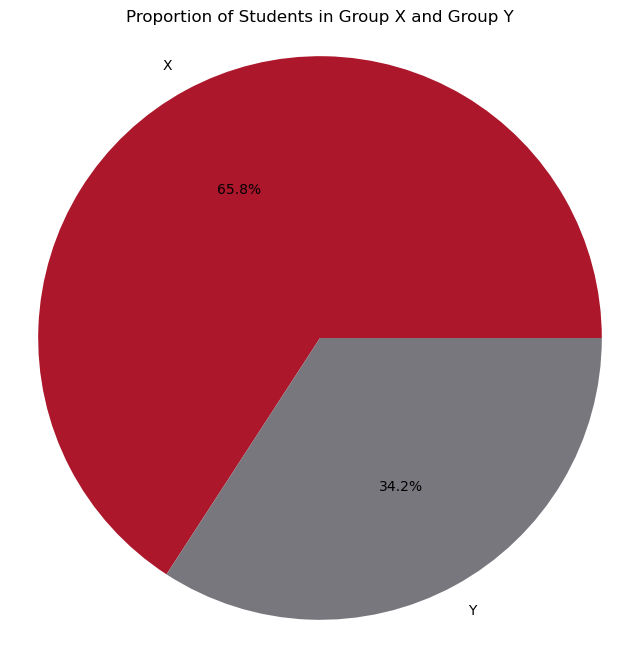

In [11]:
# Plotting Characteristic 1

# Calculate total counts for each group
student_count = original_df.groupby(by="group")['count'].sum()

# Data for the pie chart
labels = student_count.index
sizes = student_count.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Proportion of Students in Group X and Group Y')

# Save plot
plt.savefig("./viz_images/char_1.png")

# Show the plot
plt.show()

### Characteristic 2

*Proportionately more students from Group Y are in jobs unrelated to their course of study.*

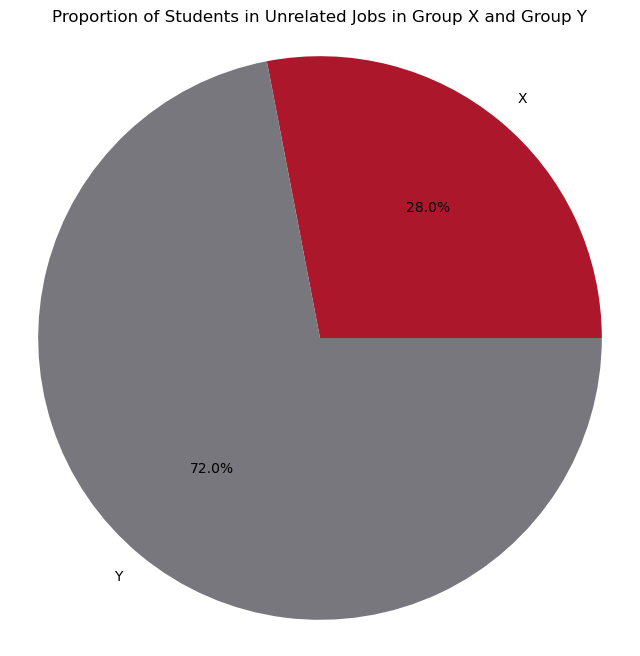

Proportion of students in unrelated jobs:
group
X    0.072664
Y    0.186667
dtype: float64


In [12]:
# Plotting Characteristic 2

# Group by 'group' and 'relationship_to_course' and sum the 'count' column
group_relationship_counts = original_df.groupby(['group', 'job_nature'])['count'].sum().unstack()

# Proportions of students in unrelated jobs for each group
unrelated_proportions = group_relationship_counts.loc[:, 'unrelated'] / group_relationship_counts.sum(axis=1)

# Data for the pie chart
labels = unrelated_proportions.index
sizes = unrelated_proportions.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Proportion of Students in Unrelated Jobs in Group X and Group Y')

# Save plot
plt.savefig("./viz_images/char_2.png")

# Show the plot
plt.show()

# Print the proportions
print("Proportion of students in unrelated jobs:")
print(unrelated_proportions)

### Characteristic 3

*The distribution of students among various industries is considerably different between the two student groups.*

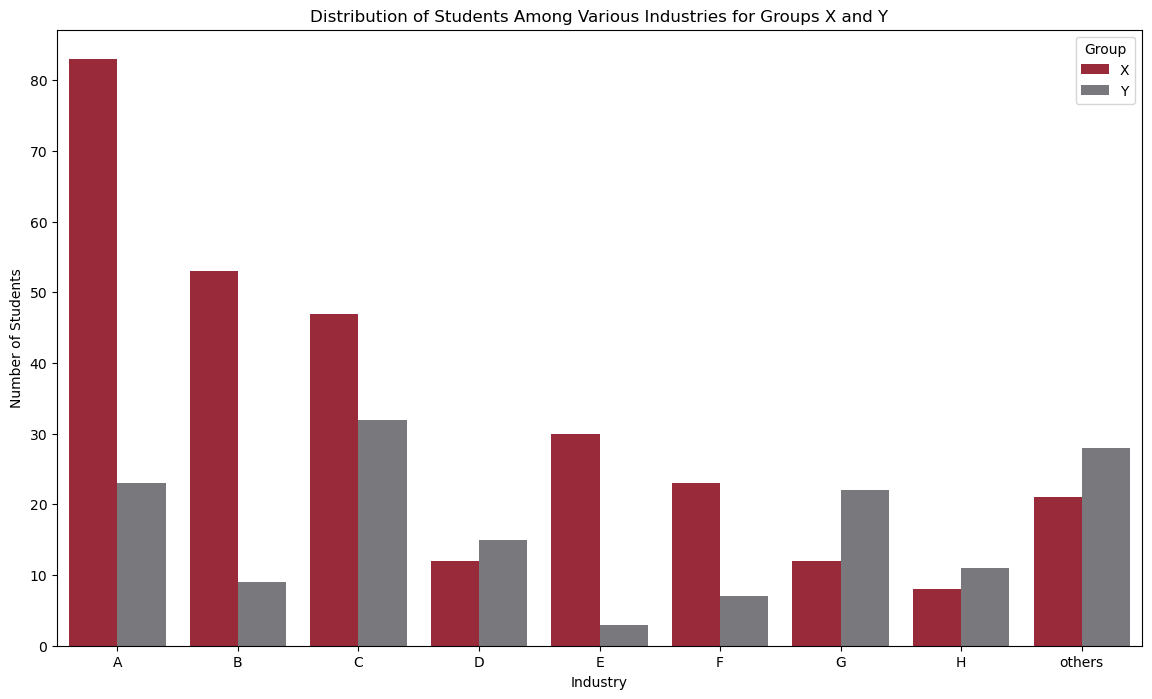

In [13]:
# Plotting Characteristic 3
plt.figure(figsize=(14, 8))
sns.barplot(data=original_df, x='industry', y='count', hue='group', palette=sns_palette)
plt.title('Distribution of Students Among Various Industries for Groups X and Y')
plt.xlabel('Industry')
plt.ylabel('Number of Students')
plt.legend(title='Group')

# Save plot
plt.savefig("./viz_images/char_3.png")

plt.show()

### Characteristic 4

*Students from Group X tend to command higher salaries, for the same type of job & industry.*

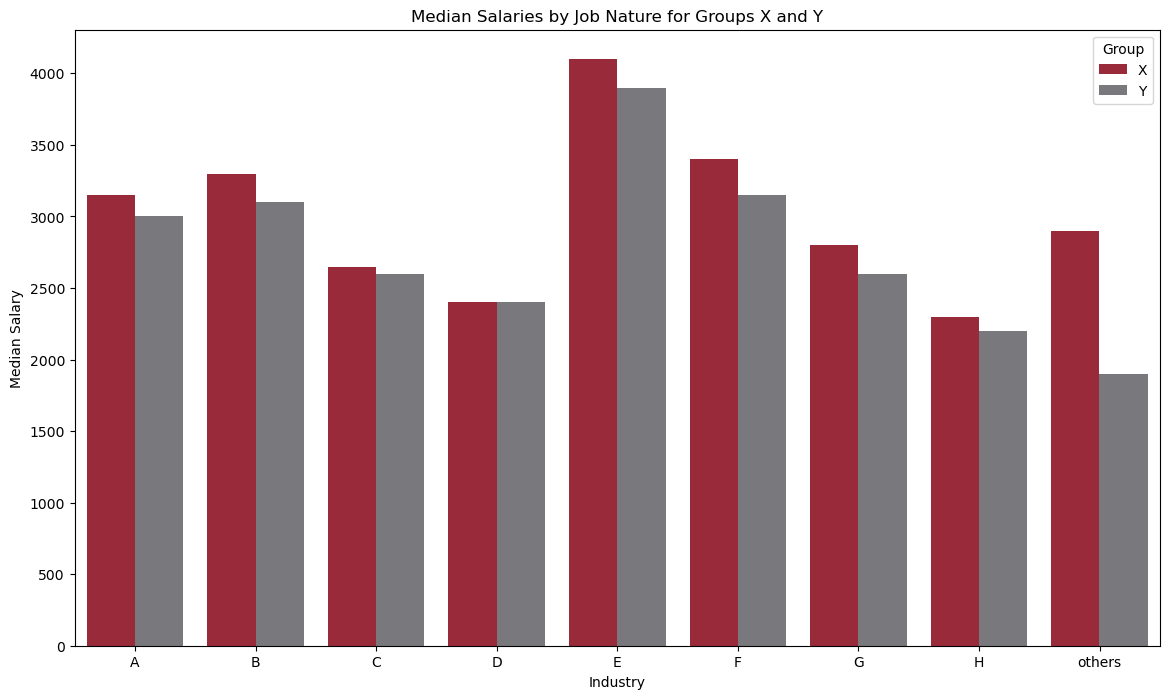

In [14]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=original_df, x='industry', y='median_salary', hue='group', palette=sns_palette)
plt.title('Median Salaries by Job Nature for Groups X and Y')
plt.xlabel('Industry')
plt.ylabel('Median Salary')
plt.legend(title='Group')

# Save plot
plt.savefig("./viz_images/char_4.png")

plt.show()

### Characteristic 5

*The salary differential between the two student groups differs by job nature and industry.*

In [7]:
# Studying the salary difference between the student groups by job_nature

job_nature_df = original_df.groupby(by=["job_nature", "group"])['median_salary'].mean().reset_index()

# Calculate median salary difference by job_nature between group X and Y
salary_diff_job_nature = job_nature_df.pivot(index='job_nature', columns='group', values='median_salary')
salary_diff_job_nature['difference'] = salary_diff_job_nature['X'] - salary_diff_job_nature['Y']

# Display the calculated salary differences
print(salary_diff_job_nature[['X', 'Y', 'difference']])

group                  X       Y  difference
job_nature                                  
closely_related   2875.0  2775.0       100.0
somewhat_related  3150.0  2962.5       187.5
unrelated         2900.0  1900.0      1000.0


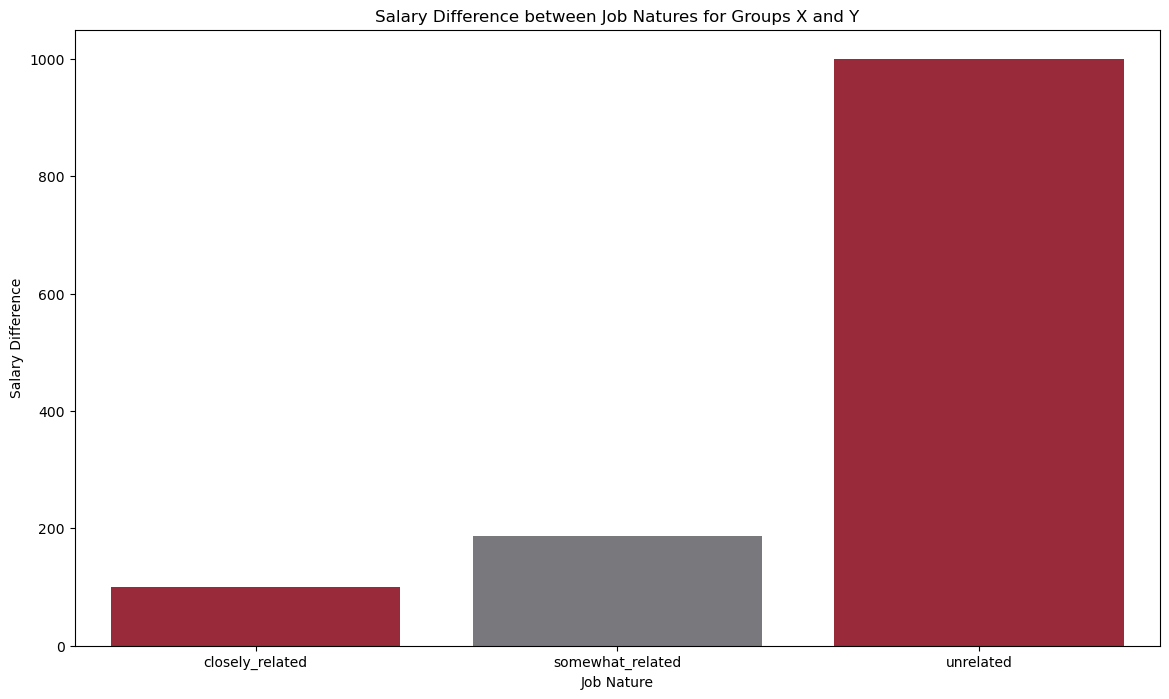

In [15]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=salary_diff_job_nature, x='job_nature', y='difference', hue='job_nature', palette=sns_palette)
plt.title('Salary Difference between Job Natures for Groups X and Y')
plt.xlabel('Job Nature')
plt.ylabel('Salary Difference')

# Save plot
plt.savefig("./viz_images/char_5_jobnature.png")

plt.show()

In [9]:
# Studying the salary difference between the student groups by industry

# Calculate median salary difference by industry between group X and Y
salary_diff = original_df.pivot(index='industry', columns='group', values='median_salary')
salary_diff['difference'] = salary_diff['X'] - salary_diff['Y']

# Display the calculated salary differences
print(salary_diff[['X', 'Y', 'difference']])

group        X     Y  difference
industry                        
A         3150  3000         150
B         3300  3100         200
C         2650  2600          50
D         2400  2400           0
E         4100  3900         200
F         3400  3150         250
G         2800  2600         200
H         2300  2200         100
others    2900  1900        1000


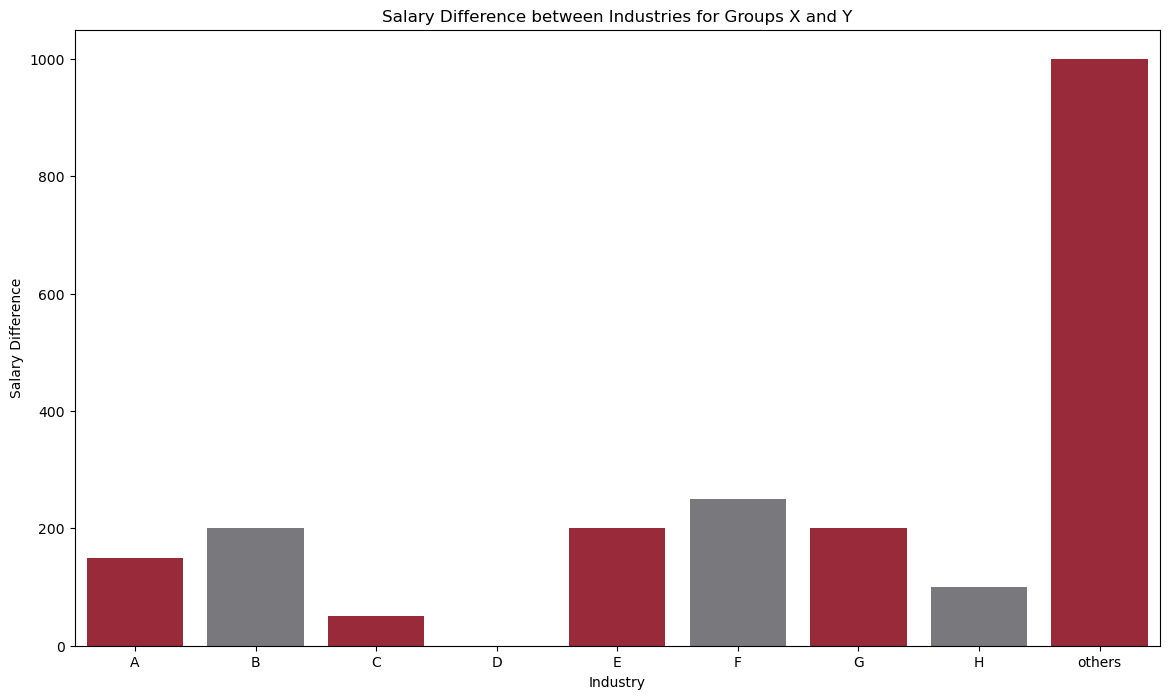

In [16]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=salary_diff, x='industry', y='difference', hue='industry', palette=sns_palette)
plt.title('Salary Difference between Industries for Groups X and Y')
plt.xlabel('Industry')
plt.ylabel('Salary Difference')

# Save plot
plt.savefig("./viz_images/char_5_industry.png")

plt.show()